# Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
df=pd.read_csv("quality data.csv")

# EDA

In [3]:
print(df.info())
print('\n',df.isnull().sum())
print('\n',df.describe())
print('\n',df.columns)
print('\n',df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
MemberID                131 non-null int64
InpatientDays           131 non-null int64
ERVisits                131 non-null int64
OfficeVisits            131 non-null int64
Narcotics               131 non-null int64
DaysSinceLastERVisit    131 non-null float64
Pain                    131 non-null int64
TotalVisits             131 non-null int64
ProviderCount           131 non-null int64
MedicalClaims           131 non-null int64
ClaimLines              131 non-null int64
StartedOnCombination    131 non-null bool
AcuteDrugGapSmall       131 non-null int64
PoorCare                131 non-null int64
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.5 KB
None

 MemberID                0
InpatientDays           0
ERVisits                0
OfficeVisits            0
Narcotics               0
DaysSinceLastERVisit    0
Pain                    0
TotalVisits             0
ProviderCount   

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [4]:
#proportion of 1;s and 0's
df['PoorCare'].value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

In [5]:
#So a baseline model will always predict 0
# accuracy = 98/(98+33)=  74.8%

In [6]:
pd.crosstab(df['PoorCare'],df['StartedOnCombination'])

StartedOnCombination,False,True
PoorCare,,
0,97,1
1,28,5


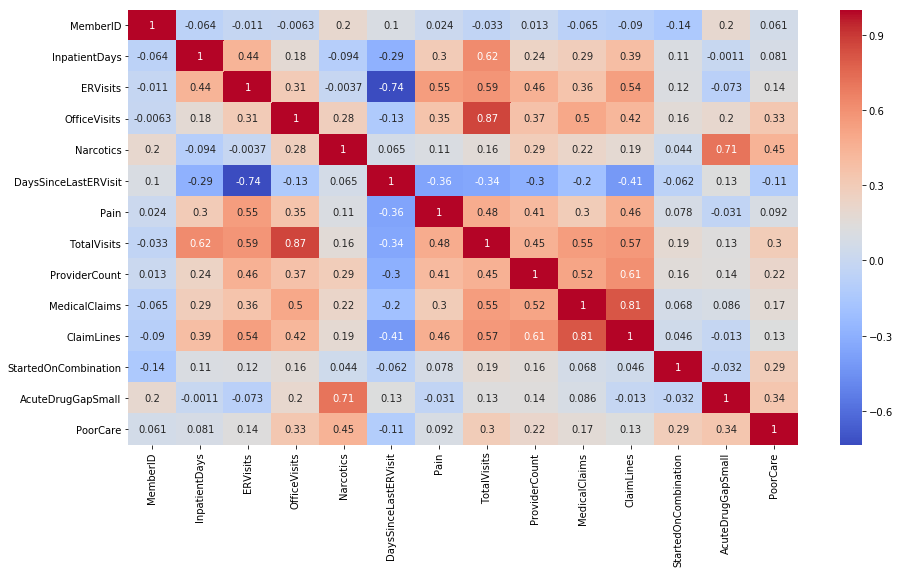

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [8]:
#Narcotics, TotalVisits, StartedOnCombination & AcuteDrugGapSmall are much useful informations

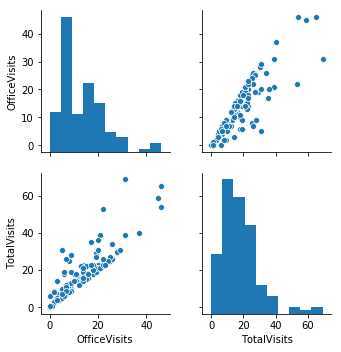

In [9]:
sns.pairplot(df[['OfficeVisits', 'TotalVisits']]) #have linear relation

# Categorical Variable

In [10]:
df.StartedOnCombination = [0 if df.StartedOnCombination[i]==False else 1 for i in range(len(df.StartedOnCombination))]

In [11]:
df.StartedOnCombination = df.StartedOnCombination.astype('category')
df.StartedOnCombination.cat.categories

Int64Index([0, 1], dtype='int64')

## Training and Testing data

In [12]:
X=df[['Narcotics', 'DaysSinceLastERVisit', 'TotalVisits', 'MedicalClaims', 'StartedOnCombination', 'AcuteDrugGapSmall']]
y=df.PoorCare
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
print(X_train.shape)
print(X_test.shape)

(104, 6)
(27, 6)


# Logistic Reg Model

In [14]:
from sklearn.linear_model import LogisticRegression
Log_reg=LogisticRegression(C = 1e9)

In [15]:
Log_reg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(Log_reg.intercept_)
print(Log_reg.coef_)

[-1.5572052]
[[ 1.01497668e-01 -2.27773861e-03  4.29328342e-02 -1.67941175e-02
   2.82728175e+00  1.69075925e-01]]


In [17]:
#predict on train data
pred_train=Log_reg.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,pred_train))
print ("*********")
print (confusion_matrix(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        82
           1       0.79      0.50      0.61        22

    accuracy                           0.87       104
   macro avg       0.83      0.73      0.76       104
weighted avg       0.86      0.87      0.85       104

*********
[[79  3]
 [11 11]]


In [18]:
#predict on test data
y_pred=Log_reg.predict(X_test)
print(classification_report(y_test,y_pred))
print ("*********")
print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77        16
           1       0.75      0.27      0.40        11

    accuracy                           0.67        27
   macro avg       0.70      0.61      0.58        27
weighted avg       0.69      0.67      0.62        27

*********
[[15  1]
 [ 8  3]]


ROC curve & AUC

In [50]:
pred1=Log_reg.predict_proba(X_test)

(-0.05, 1.05)

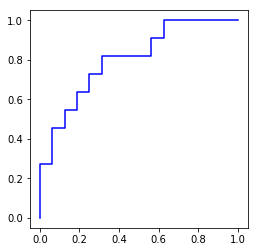

In [52]:
from sklearn import metrics
fpr, tpr, threshold= metrics.roc_curve(y_test, pred1[:,1]) #pass the actual test DV and 
#predicted probability (only P(y)=1)
plt.plot(fpr, tpr, label='ROC curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [56]:
AUC= metrics.auc(fpr,tpr)
AUC
#area under the curve is good i.e. model covers 80% of the data points well

0.8011363636363636

In [61]:
#CONVERT THE PROBABILITITS TO 1'S AND 0'S APPLYING OUT OWN THRESHOLD
#HERE 0.4
x=[]
for i in range(len(pred1[:,1])):
    if (pred1[:,1][i]>=0.4):
        x.append(1)
    else:
        x.append(0)
y_pred_roc=np.array(x)
pd.crosstab(y_test,y_pred_roc)

col_0,0,1
PoorCare,,
0,15,1
1,6,5


In [62]:
print(classification_report(y_test,y_pred_roc))
print ("*********")
print (confusion_matrix(y_test,y_pred_roc))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.83      0.45      0.59        11

    accuracy                           0.74        27
   macro avg       0.77      0.70      0.70        27
weighted avg       0.76      0.74      0.72        27

*********
[[15  1]
 [ 6  5]]


In [ ]:
#changing the threshold based on ROC curve improves the results

# SVM Model

In [19]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1,gamma=2)
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
#prediction on train data
pred_y_train=model.predict(X_train)
print(classification_report(y_train,pred_y_train))
print ("*********")
print (confusion_matrix(y_train,pred_y_train))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        82
           1       0.79      0.50      0.61        22

    accuracy                           0.87       104
   macro avg       0.83      0.73      0.76       104
weighted avg       0.86      0.87      0.85       104

*********
[[79  3]
 [11 11]]


In [21]:
#prediction on test data
pred_y=model.predict(X_test)
print(classification_report(y_test,pred_y))
print ("*********")
print (confusion_matrix(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.36      0.53        11

    accuracy                           0.74        27
   macro avg       0.85      0.68      0.68        27
weighted avg       0.82      0.74      0.70        27

*********
[[16  0]
 [ 7  4]]


In [22]:
#performing better than logistic reg model on test data

Parameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
k=['linear']
c=[0.0001, 0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10]
g=[0.0001, 0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10]
param_grid = {'C': c, 'gamma' : g, 'kernel': k} #this is taken as a dictionary
new_model=SVC()
grid = GridSearchCV(new_model, param_grid,scoring='accuracy')

In [24]:
grid.fit(X_train, y_train)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 2, 4, 6, 8, 10],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [25]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}


Boosted Model

In [26]:
model_svm = SVC(kernel='linear', C=1,gamma=0.0001)
model_svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
#prediction on train data
y_pred_svm=model_svm.predict(X_train)
print(classification_report(y_train,y_pred_svm))
print ("*********")
print (confusion_matrix(y_train,y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        82
           1       0.79      0.50      0.61        22

    accuracy                           0.87       104
   macro avg       0.83      0.73      0.76       104
weighted avg       0.86      0.87      0.85       104

*********
[[79  3]
 [11 11]]


In [28]:
#prediction on test data
pred_y_svm=model_svm.predict(X_test)
print(classification_report(y_test,pred_y_svm))
print ("*********")
print (confusion_matrix(y_test,pred_y_svm))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.36      0.53        11

    accuracy                           0.74        27
   macro avg       0.85      0.68      0.68        27
weighted avg       0.82      0.74      0.70        27

*********
[[16  0]
 [ 7  4]]


# KNN

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [117]:
knn_y_train=knn_model.predict(X_train)
print(classification_report(y_train,knn_y_train))
print ("*********")
print (confusion_matrix(y_train,knn_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        22

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

*********
[[82  0]
 [ 0 22]]


In [118]:
knn_y_test=knn_model.predict(X_test)
print(classification_report(y_test,knn_y_test))
print ("*********")
print (confusion_matrix(y_test,knn_y_test))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.86      0.55      0.67        11

    accuracy                           0.78        27
   macro avg       0.80      0.74      0.75        27
weighted avg       0.79      0.78      0.77        27

*********
[[15  1]
 [ 5  6]]


In [119]:
#Performance of KNN on test data is better than the others 